In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('C:/Users/Abhijit Kharade/Downloads/Salary_Data.csv')

In [4]:
data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
#Rearranging columns

new_columns=['Salary','YearsExperience']
data=data[new_columns]

In [8]:
data.head()

,Salary,YearsExperience
0,39343.0,1.1
1,46205.0,1.3
2,37731.0,1.5
3,43525.0,2.0
4,39891.0,2.2


In [9]:
#Renaming columns
data=data.rename({'Salary':'salary','YearsExperience':'ye'},axis=1)

In [ ]:
#Data visualisation and EDA

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   salary  30 non-null     float64
 1   ye      30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [21]:
data.columns

Index(['salary', 'ye'], dtype='object')

In [ ]:
#Correlation Analysis

In [11]:
data.corr()

,salary,ye
salary,1.000000,0.978242
ye,0.978242,1.000000


In [12]:
data.isnull().sum()

salary    0
ye        0
dtype: int64

In [13]:
import seaborn as sns

C:\Users\Abhijit Kharade\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


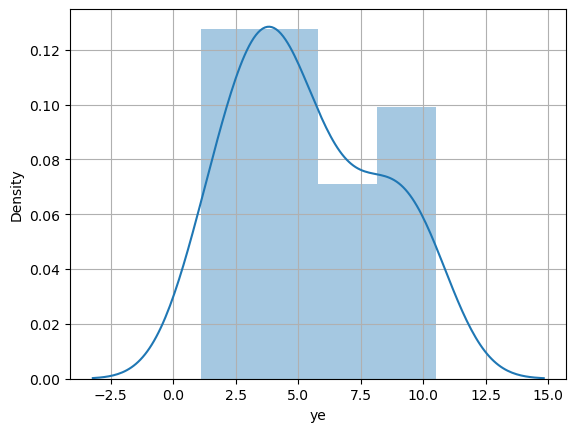

In [14]:
sns.distplot(data['ye'])
import warnings
warnings.filterwarnings("ignore")
plt.grid()

{'whiskers': [<matplotlib.lines.Line2D at 0x1cb4a2088e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb4a208e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb4a208670>],
 'medians': [<matplotlib.lines.Line2D at 0x1cb4a217460>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cb4a217730>],
 'means': []}

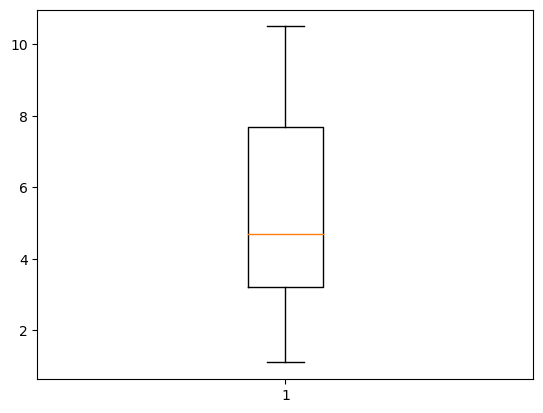

In [22]:
plt.boxplot(data.ye)

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

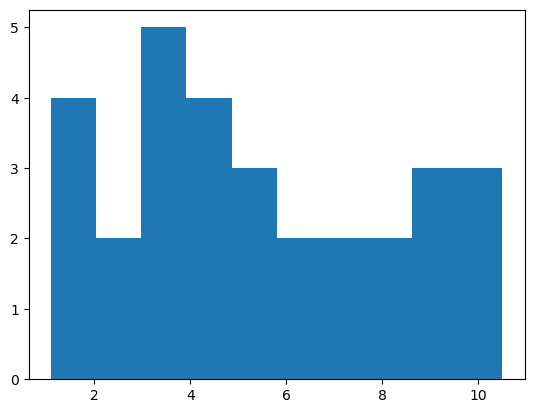

In [24]:
plt.hist(data.ye)

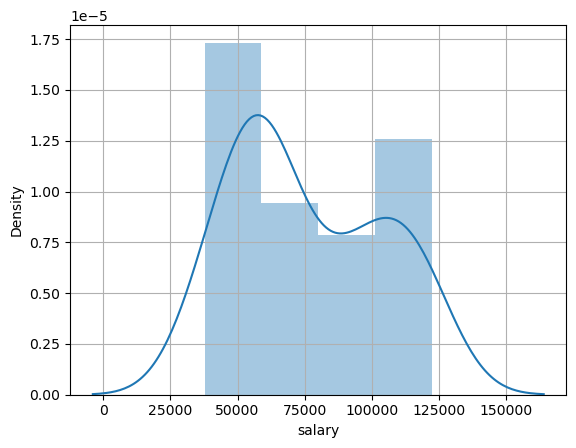

In [15]:
sns.distplot(data['salary'])
plt.grid()

{'whiskers': [<matplotlib.lines.Line2D at 0x1cb4a272370>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb4a272910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb4a2720a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cb4a272eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cb4a27f1f0>],
 'means': []}

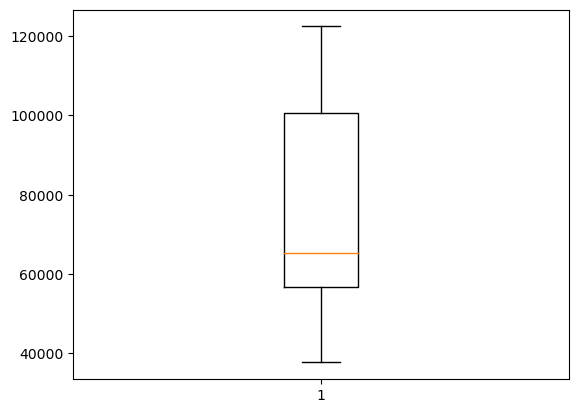

In [23]:
plt.boxplot(data.salary)

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

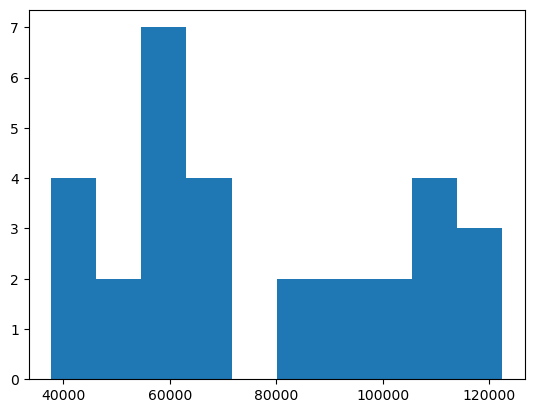

In [25]:
plt.hist(data.salary)

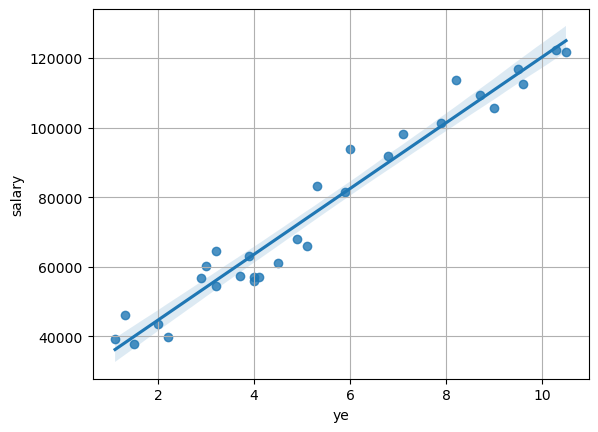

In [16]:
sns.regplot(x='ye',y='salary',data=data)
plt.grid()

In [ ]:
#Building Model

In [17]:
import statsmodels.formula.api as smf

In [18]:
model=smf.ols("salary~ye",data=data).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        12:47:28   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
ye          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model.params

Intercept    25792.200199
ye            9449.962321
dtype: float64

In [26]:
pred = model.predict(data.iloc[:,1])
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

Text(0, 0.5, 'Salary')

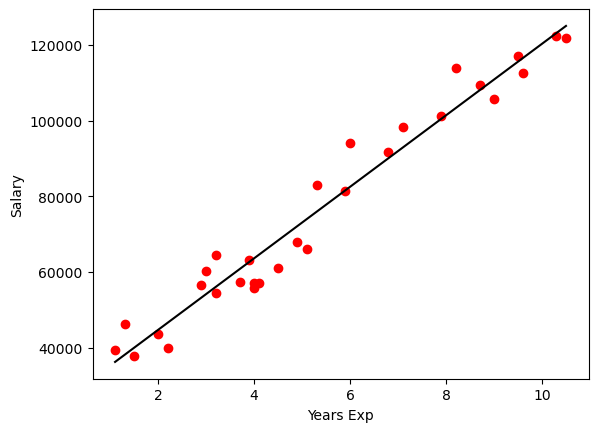

In [27]:
plt.scatter(x=data['ye'],y=data['salary'],color='red');plt.plot(data['ye'],pred,color='black');plt.xlabel('Years Exp');plt.ylabel('Salary')


Text(0, 0.5, 'Years exp')

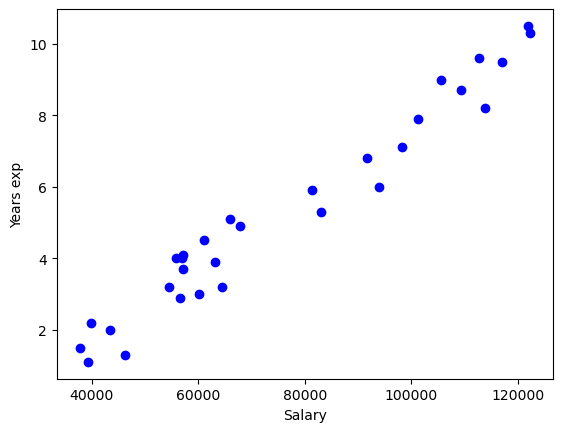

In [28]:
plt.plot(data.salary,data.ye,"bo")
plt.xlabel("Salary")
plt.ylabel("Years exp")

In [30]:
import numpy as np

data.salary.corr(data.ye) # # correlation value between X and Y
np.corrcoef(data.salary,data.ye)


array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [31]:
model.conf_int(0.05)

,0,1
Intercept,21136.061314,30448.339084
ye,8674.118747,10225.805896


In [32]:
pred.corr(data.salary)

0.9782416184887601

In [ ]:

# Transforming variables for accuracy

In [33]:
model2=smf.ols("salary~np.log(ye)",data=data).fit()

In [34]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           3.25e-13
Time:                        13:00:52   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(ye)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
model2.params


Intercept     14927.97177
np.log(ye)    40581.98796
dtype: float64

In [36]:
print(model2.conf_int(0.01))

                       0             1
Intercept     679.965646  29175.977894
np.log(ye)  31815.666558  49348.309362


In [38]:
pred2 = model2.predict(data.iloc[:,1])

In [39]:
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [40]:
pred2.corr(data.salary)

0.924061081788264

Text(0, 0.5, 'Salary')

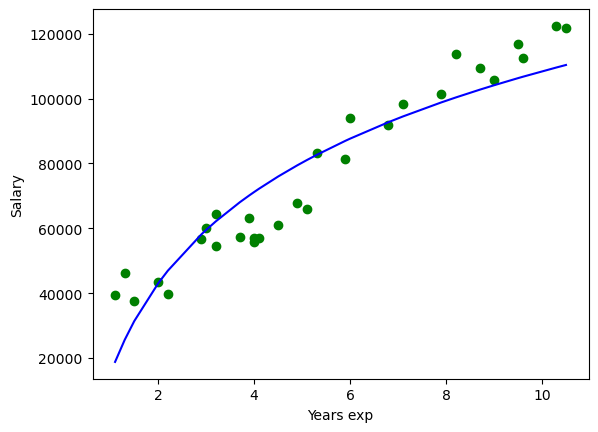

In [41]:
plt.scatter(x=data['ye'],y=data['salary'],color='green')
plt.plot(data['ye'],pred2,color='blue');plt.xlabel('Years exp');plt.ylabel('Salary')


In [ ]:
# Exponential transformation

In [42]:
model3=smf.ols("np.log(salary)~ye",data=data).fit()

In [43]:
model3.params

Intercept    10.507402
ye            0.125453
dtype: float64

In [44]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           7.03e-18
Time:                        13:05:59   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
ye             0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
pred3 = model3.predict(data.iloc[:,1])

In [48]:
pred3.corr(data.salary)

0.9782416184887602

In [49]:
print(model3.conf_int(0.01))

                   0          1
Intercept  10.401175  10.613629
ye          0.107752   0.143153


In [50]:
pred_log = model3.predict(pd.DataFrame(data['ye']))
pred_log

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [51]:
pred3=np.exp(pred_log)  # as we have used log(salary) in preparing model so we need to convert it back
pred3

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [52]:
pred3.corr(data.salary)

0.9660469705377088

Text(0, 0.5, 'Salary')

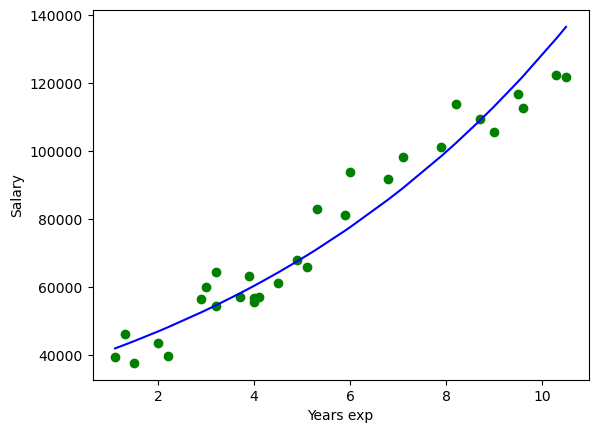

In [53]:
plt.scatter(x=data['ye'],y=data['salary'],color='green');plt.plot(data.ye,np.exp(pred_log),color='blue');plt.xlabel('Years exp');plt.ylabel('Salary')

In [54]:
resid_3 = pred3-data.salary

In [56]:

# so we will consider the model having highest R-Squared value which is the log transformation - model3
# getting residuals of the entire data set
time_resid = model3.resid_pearson

In [57]:
time_resid

array([-0.66732261,  0.71866312, -1.60729238, -0.78878267, -1.9356925 ,
        0.74867647,  1.23436001, -0.0398886 ,  1.68260228, -0.17836411,
        0.58917114, -0.81508595, -0.60434465, -0.71028167, -0.52600626,
        0.04320755, -0.50424366,  1.58695853,  0.60373565,  1.94386552,
        0.6763497 ,  0.99482518,  0.27970841,  1.0847233 ,  0.04297985,
       -0.70724335, -0.30175692, -0.81559685, -0.86410542, -1.1638191 ])

Text(0, 0.5, 'Standardized Residual')

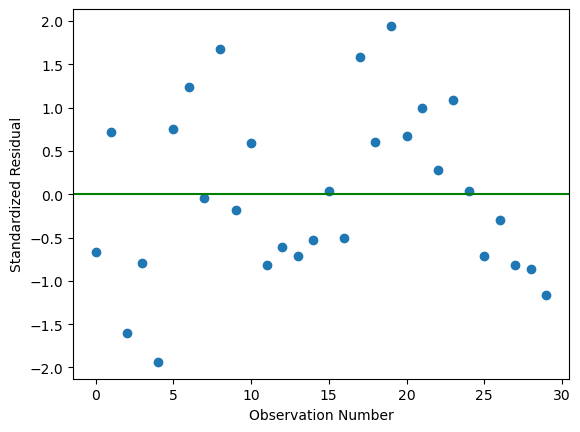

In [58]:
plt.plot(model3.resid_pearson,'o');plt.axhline(y=0,color='green');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")


Text(0, 0.5, 'Actual')

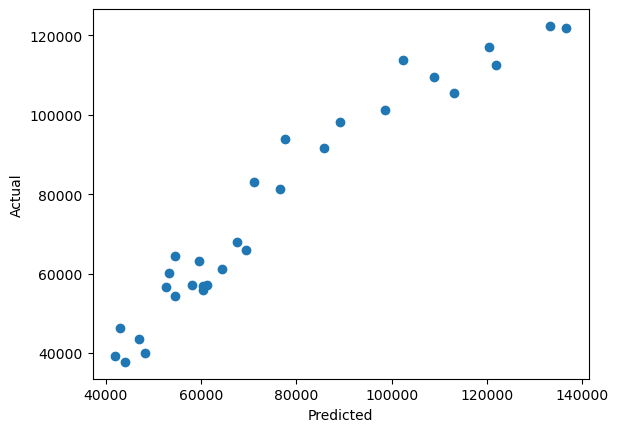

In [59]:
# Predicted vs actual values
plt.scatter(x=pred3,y=data.salary);plt.xlabel("Predicted");plt.ylabel("Actual")


In [60]:
# Quadratic model
data["ye_Sq"] = data.ye*data.ye

In [61]:
data["ye_Sq"]

0       1.21
1       1.69
2       2.25
3       4.00
4       4.84
5       8.41
6       9.00
7      10.24
8      10.24
9      13.69
10     15.21
11     16.00
12     16.00
13     16.81
14     20.25
15     24.01
16     26.01
17     28.09
18     34.81
19     36.00
20     46.24
21     50.41
22     62.41
23     67.24
24     75.69
25     81.00
26     90.25
27     92.16
28    106.09
29    110.25
Name: ye_Sq, dtype: float64

In [62]:
model_quad = smf.ols("salary~ye+ye_Sq",data=data).fit()

In [63]:
model_quad.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           3.59e-19
Time:                        13:15:14   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
ye          9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
ye_Sq         16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
model_quad.params

Intercept    26214.932677
ye            9259.283888
ye_Sq           16.392566
dtype: float64

In [65]:
pred_quad = model_quad.predict()

Text(0, 0.5, 'Salary')

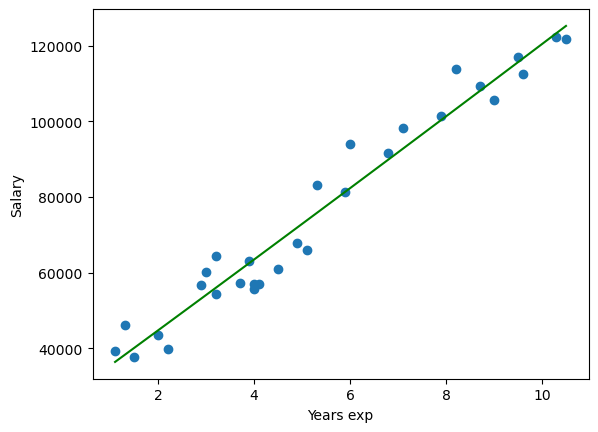

In [66]:
plt.scatter(data.ye,data.salary)
plt.plot(data.ye,pred_quad,color='g')
plt.xlabel('Years exp')
plt.ylabel('Salary')

Text(0, 0.5, 'Standardized Residual')

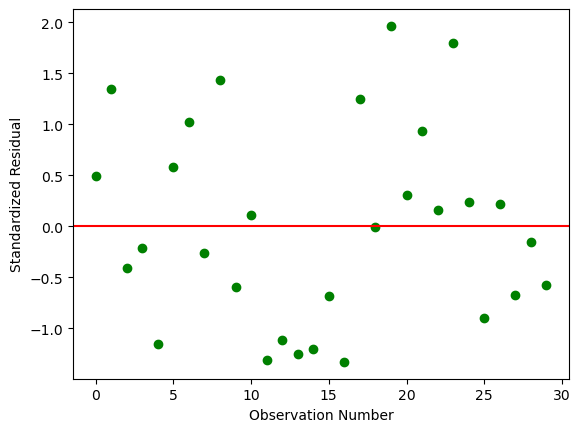

In [70]:
plt.scatter(np.arange(30),model_quad.resid_pearson,color='g')
plt.axhline(y=0,color='r')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

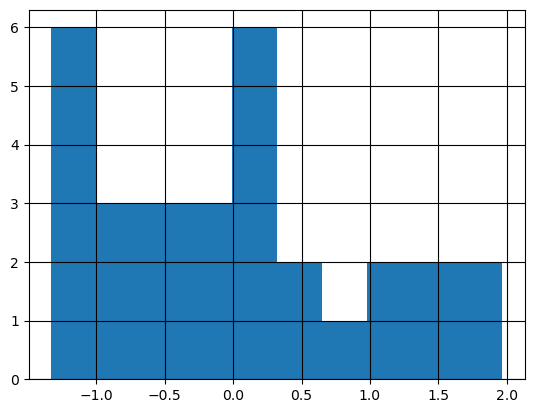

In [71]:
plt.hist(model_quad.resid_pearson)
plt.grid(color='black')

In [72]:
from sklearn.linear_model import LinearRegression
import numpy as np

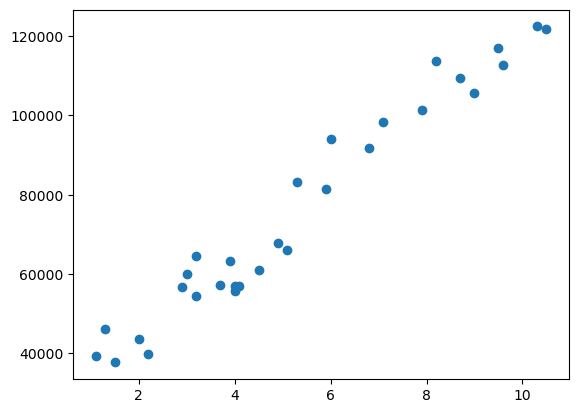

In [73]:
plt.scatter(data.ye,data.salary)

In [74]:
model1 = LinearRegression()

In [76]:
model1.fit(data.ye.values.reshape(-1,1),data.salary)

LinearRegression()

In [77]:
pred1 = model1.predict(data.ye.values.reshape(-1,1))

In [ ]:
# Adjusted R-Squared value

In [78]:
model1.score(data.ye.values.reshape(-1,1),data.salary)

0.9569566641435086

In [79]:
rmse1 = np.sqrt(np.mean((pred1-data.salary)**2))

In [80]:
model1.coef_

array([9449.96232146])

In [81]:
model1.intercept_


25792.20019866871

In [ ]:
#### Residuals Vs Fitted values

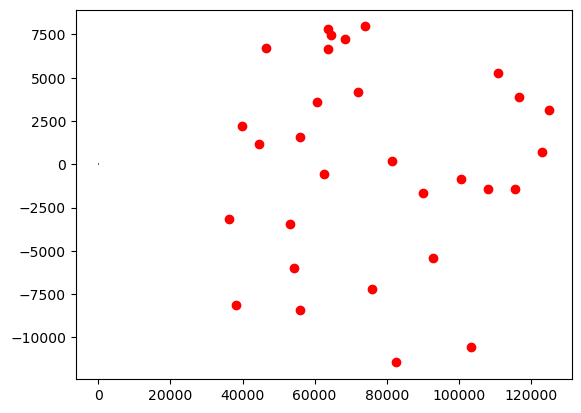

In [82]:
plt.scatter(pred1,(pred1-data.salary),c="r")
plt.hlines(y=0,xmin=0,xmax=300) 

(array([2., 2., 2., 1., 2., 6., 3., 4., 2., 6.]),
 array([-11448.0258726 ,  -9507.42248153,  -7566.81909046,  -5626.21569939,
         -3685.61230832,  -1745.00891726,    195.59447381,   2136.19786488,
          4076.80125595,   6017.40464702,   7958.00803809]),
 <BarContainer object of 10 artists>)

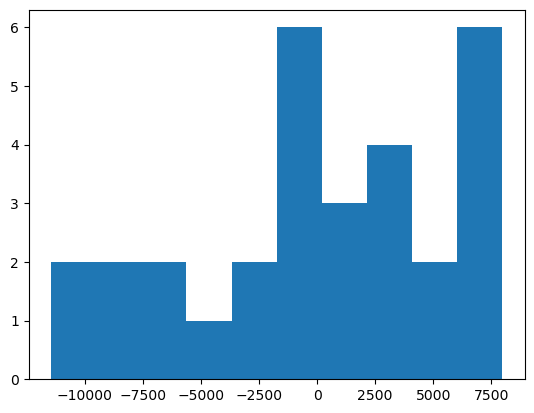

In [83]:
# checking normal distribution for residual
plt.hist(pred1-data.salary)

In [ ]:
### Fitting Quadratic Regression 

In [84]:
data["ye_sqrd"] = data.ye*data.ye

In [85]:
model2 = LinearRegression()

In [86]:
model2.fit(X = data.iloc[:,[0,2]],y=data.salary)

LinearRegression()

In [87]:
pred2 = model2.predict(data.iloc[:,[0,2]])

In [ ]:
# Adjusted R-Squared value

In [88]:
model2.score(data.iloc[:,[0,2]],data.salary)

1.0

In [89]:
rmse2 = np.sqrt(np.mean((pred2-data.salary)**2))

In [90]:
model2.coef_

array([1.00000000e+00, 1.16759836e-13])

In [91]:
model2.intercept_

2.9103830456733704e-11

In [ ]:
#### Residuals Vs Fitted values

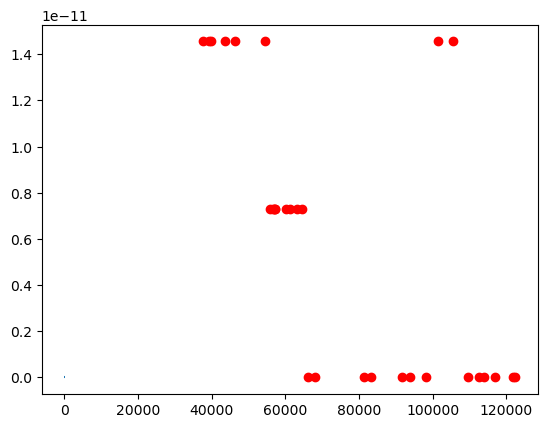

In [92]:
plt.scatter(pred2,(pred2-data.salary),c="r")
plt.hlines(y=0,xmin=0,xmax=200)  

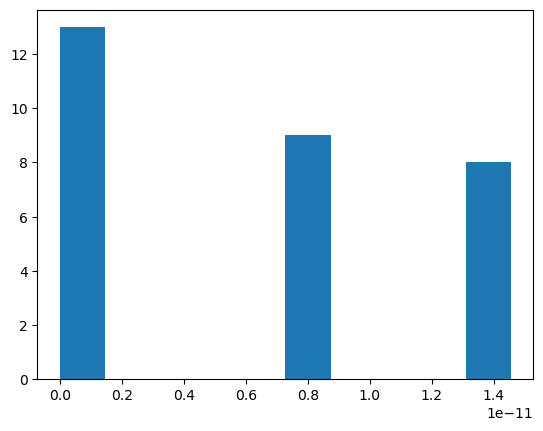

In [93]:
# Checking normal distribution
plt.hist(pred2-data.salary)
import pylab
import scipy.stats as st

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 7.27595761e-12, 7.27595761e-12, 7.27595761e-12,
         7.27595761e-12, 7.27595761e-12, 7.27595761e-12, 7.27595761e-12,
         7.27595761e-12, 7.27595761e-12, 1.45519152e-11, 1.45519152e-11,
         1.45519152e-11, 1.45519152e-11, 1.45519152e-11, 1.45519152e-11,
         1.45519152e-11, 1.45519152e-11])),

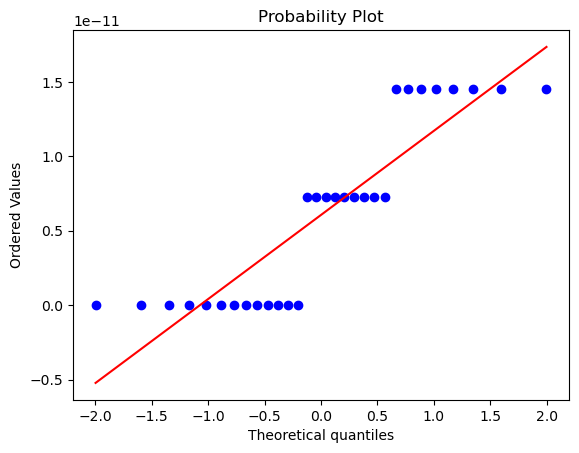

In [94]:
st.probplot(pred2-data.salary,dist="norm",plot=pylab)

In [95]:
# Let us prepare a model by applying transformation on dependent variable
data["salary_sqrt"] = np.sqrt(data.salary)


In [96]:
model3 = LinearRegression()

In [97]:
model3.fit(X = data.iloc[:,[0,2]],y=data.salary_sqrt)

LinearRegression()

In [98]:
pred3 = model3.predict(data.iloc[:,[0,2]])

In [99]:
# Adjusted R-Squared value
model3.score(data.iloc[:,[0,2]],data.salary_sqrt)

0.9972725863178189

In [100]:
rmse3 = np.sqrt(np.mean(((pred3)**2-data.salary)**2))

In [101]:
model3.coef_

array([ 0.00211255, -0.25930298])

In [102]:
model3.intercept_

120.1061537443345

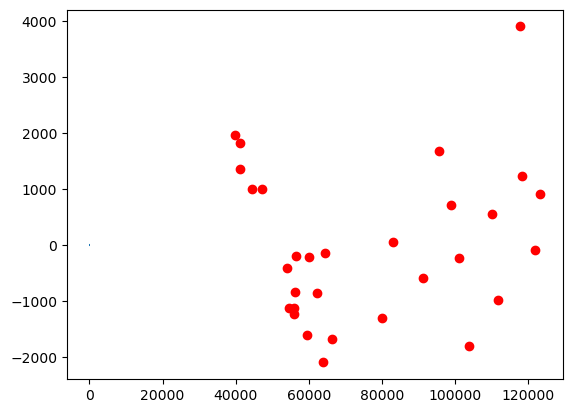

In [103]:
#### Residuals Vs Fitted values

plt.scatter((pred3)**2,((pred3)**2-data.salary),c="r")
plt.hlines(y=0,xmin=0,xmax=300)  

(array([4., 5., 4., 6., 2., 5., 3., 0., 0., 1.]),
 array([-2095.15923211, -1494.77623471,  -894.39323731,  -294.0102399 ,
          306.3727575 ,   906.75575491,  1507.13875231,  2107.52174972,
         2707.90474712,  3308.28774452,  3908.67074193]),
 <BarContainer object of 10 artists>)

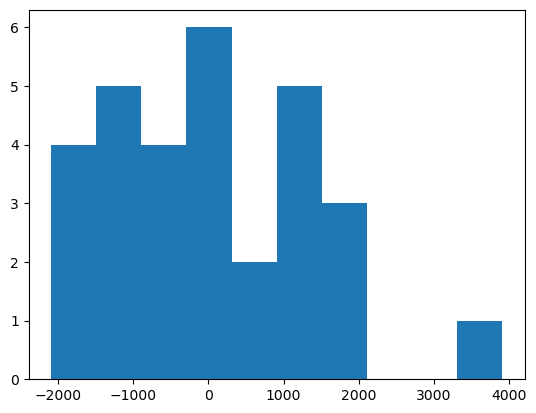

In [104]:
# checking normal distribution for residuals 
plt.hist((pred3)**2-data.salary)

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-2095.15923211, -1801.2851862 , -1681.75260025, -1596.72782077,
         -1294.69387389, -1227.29390271, -1127.83264243, -1119.83800067,
          -974.66363947,  -861.16436254,  -843.97613056,  -583.92197685,
          -403.24829722,  -223.23967366,  -202.16626167,  -195.54770051,
          -134.90818095,   -85.64828083,    57.78324672,   566.19954015,
           726.32031905,   918.22196856,  1003.50969567,  1004.91425491,
          1234.4096235 ,  1367.9385042 ,  1679.75417923,  1828.07005637,
          1962.16869944,  3908.67074193])),

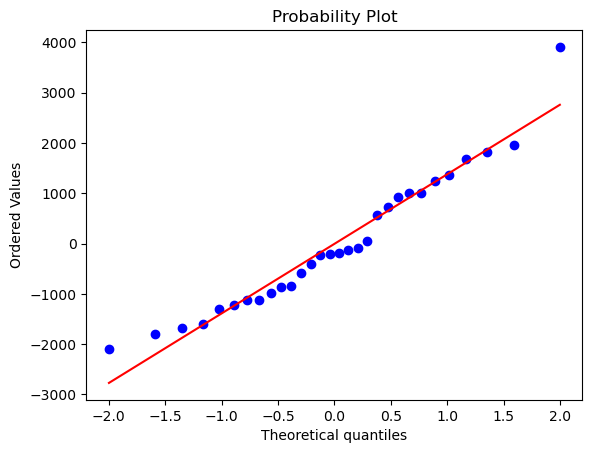

In [105]:
st.probplot((pred3)**2-data.salary,dist="norm",plot=pylab)

In [106]:
# Let us prepare a model by applying transformation on dependent variable without transformation on input variables 
model4 = LinearRegression()

In [107]:
model4.fit(X = data.ye.values.reshape(-1,1),y=data.salary_sqrt)

LinearRegression()

In [108]:
pred4 = model4.predict(data.ye.values.reshape(-1,1))

In [109]:
# Adjusted R-Squared value
model4.score(data.ye.values.reshape(-1,1),data.salary_sqrt)

0.949835353386529

In [110]:
rmse4 = np.sqrt(np.mean(((pred4)**2-data.salary)**2))


In [111]:
model4.coef_

array([17.05653205])

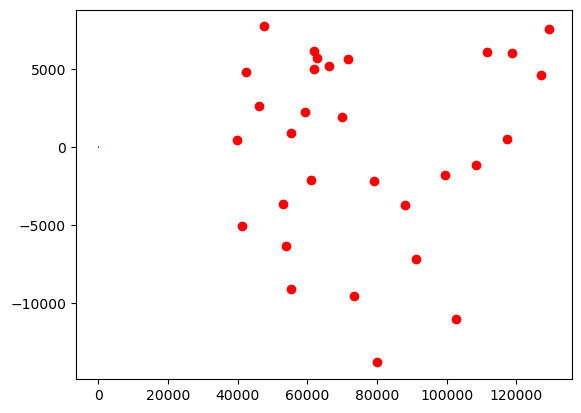

In [112]:
#### Residuals Vs Fitted values

plt.scatter((pred4)**2,((pred4)**2-data.salary),c="r")
plt.hlines(y=0,xmin=0,xmax=300)  

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-13828.69028846, -11050.86024821,  -9592.87606245,  -9087.7927052 ,
          -7188.79486389,  -6386.38770647,  -5047.25654489,  -3716.2247755 ,
          -3666.45744854,  -2214.31520188,  -2099.92727082,  -1795.3008483 ,
          -1129.42246716,    442.25167088,    499.84027951,    912.2072948 ,
           1904.45347807,   2254.01864794,   2619.74762985,   4617.48739174,
           4822.50926219,   5007.32752837,   5171.87910997,   5628.15169638,
           5735.40083327,   6005.93139855,   6113.66227   ,   6170.32752837,
           7579

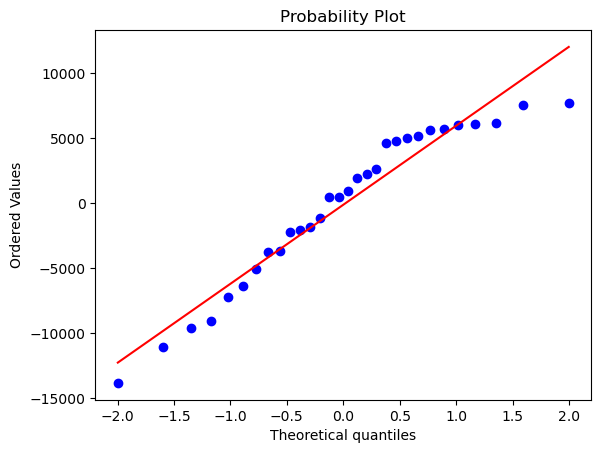

In [113]:
st.probplot((pred4)**2-data.salary,dist="norm",plot=pylab)

(array([1., 2., 1., 2., 3., 4., 3., 3., 4., 7.]),
 array([-13828.69028846, -11672.72400793,  -9516.75772739,  -7360.79144686,
         -5204.82516632,  -3048.85888579,   -892.89260525,   1263.07367528,
          3419.03995582,   5575.00623635,   7730.97251689]),
 <BarContainer object of 10 artists>)

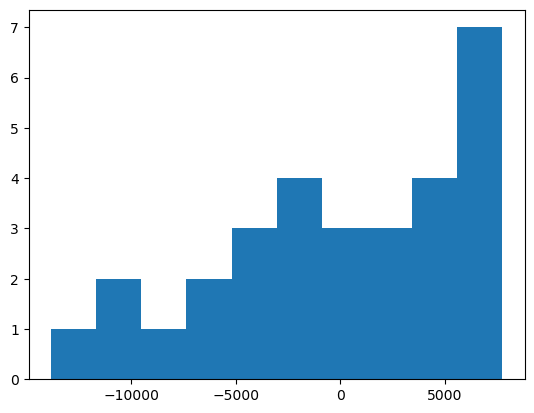

In [114]:
plt.hist((pred4)**2-data.salary)